/var/folders/kt/s7g2z2dx6k93rh9dqlld0_6m0000gn/T/ipykernel_85276/304471466.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])  # Adjust if needed to match your column name
/var/folders/kt/s7g2z2dx6k93rh9dqlld0_6m0000gn/T/ipykernel_85276/304471466.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])  # Adjust if needed to match your column name
/var/folders/kt/s7g2z2dx6k93rh9dqlld0_6m0000gn/T/ipykernel_85276/304471466.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

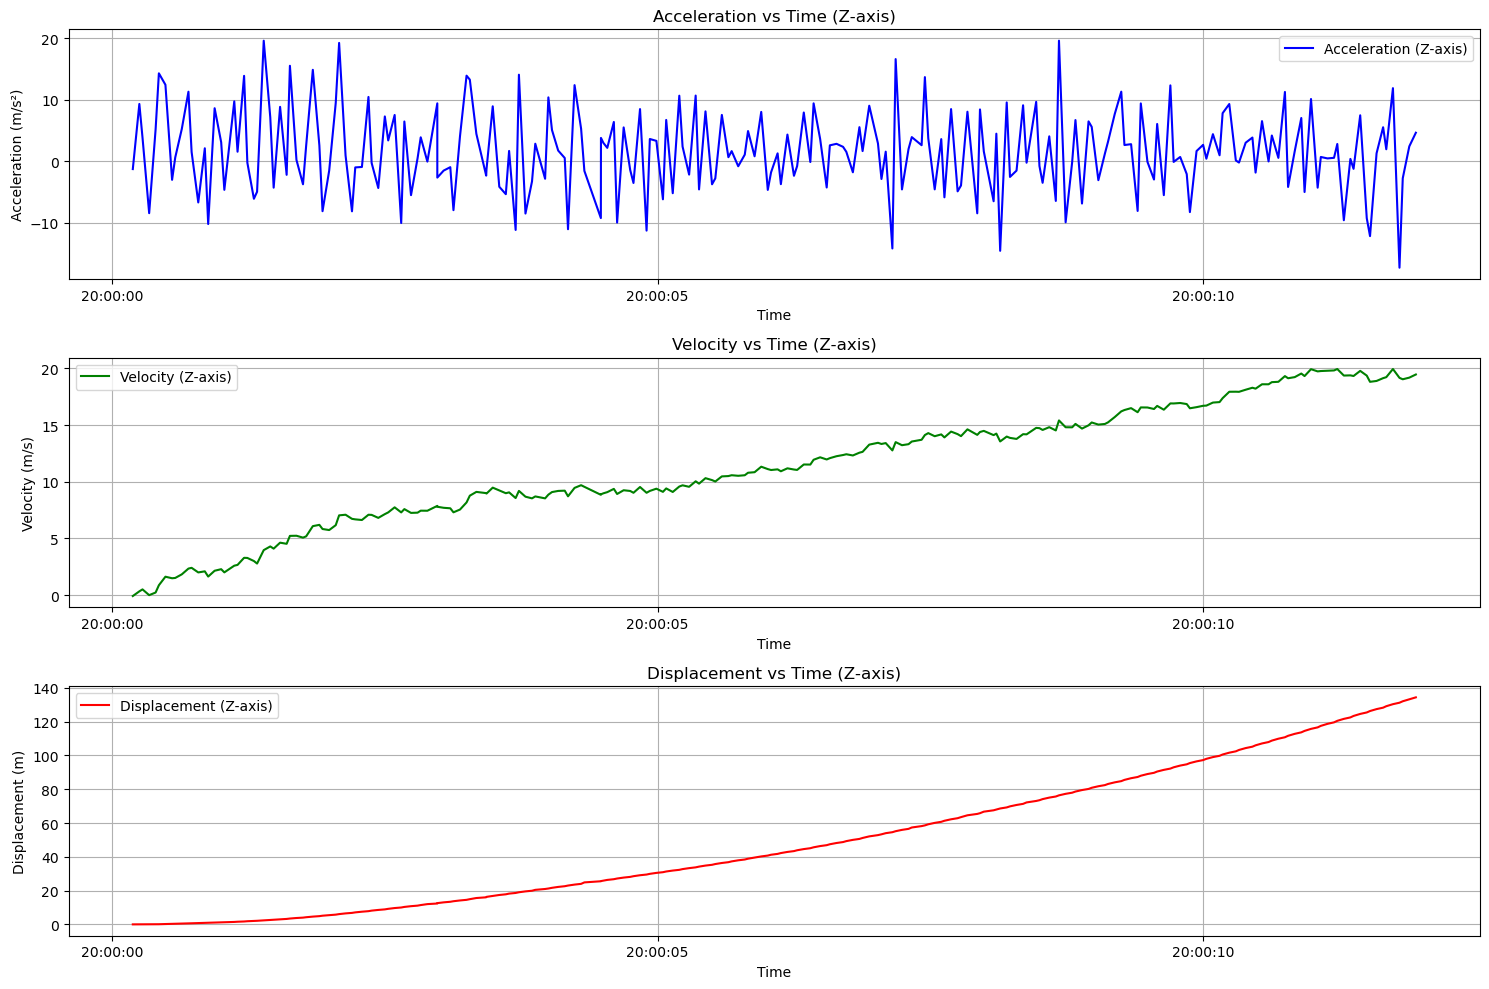

Final Displacement (Z-axis): 134.42 meters


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file, skipping the first 4 rows
d = pd.read_csv('accel100.csv', skiprows=4)
df = d.iloc[94:330]

# Combine 'Date' and 'HostTimestamp' columns into a single datetime column if not already combined
# If 'Date' and 'HostTimestamp' are in separate columns, combine them as follows:
# df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['HostTimestamp'].astype(str), format='%d/%m/%Y %H:%M:%S.%f', errors='coerce')

# If 'Timestamp' is already present in your CSV:
df['Date'] = pd.to_datetime(df['Date'])  # Adjust if needed to match your column name

# Convert Z-axis acceleration from mg to m/s²
df['Acc_Z (m/s²)'] = df['Z (mg)'] * 0.00981

# Compute time differences (for trapezoidal integration)
time_diffs = np.gradient(df['Date'].astype(np.int64) / 1e9)  # Convert datetime to seconds

# Integrate acceleration to get velocity using the trapezoidal rule
df['Velocity_Z'] = np.cumsum(df['Acc_Z (m/s²)'] * time_diffs)

# Integrate velocity to get displacement using the trapezoidal rule
df['Displacement_Z'] = np.cumsum(df['Velocity_Z'] * time_diffs)

# Plotting
plt.figure(figsize=(15, 10))

# Plot Acceleration
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Acc_Z (m/s²)'], label='Acceleration (Z-axis)', color='blue')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration vs Time (Z-axis)')
plt.grid(True)
plt.legend()

# Plot Velocity
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Velocity_Z'], label='Velocity (Z-axis)', color='green')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time (Z-axis)')
plt.grid(True)
plt.legend()

# Plot Displacement
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Displacement_Z'], label='Displacement (Z-axis)', color='red')
plt.xlabel('Time')
plt.ylabel('Displacement (m)')
plt.title('Displacement vs Time (Z-axis)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print the final displacement
final_displacement = df['Displacement_Z'].iloc[-1]
print(f"Final Displacement (Z-axis): {final_displacement:.2f} meters")